In [2]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVR
import requests

matplotlib.style.use('ggplot')

In [3]:
########################################## Reading and Analysing Data ###########################################################
df = pd.read_excel( "Online Retail.xlsx", na_values = '?')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540408 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
################################################# Data cleaning & Wrangling #####################################################
df = df.loc[:, ['Quantity','InvoiceDate','UnitPrice']]
df.head()

,Quantity,InvoiceDate,UnitPrice
0,6,2010-12-01 08:26:00,2.55
1,6,2010-12-01 08:26:00,3.39
2,8,2010-12-01 08:26:00,2.75
3,6,2010-12-01 08:26:00,3.39
4,6,2010-12-01 08:26:00,3.39


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 12.4 MB


In [10]:
df.loc[:,'Quantity'] = df.Quantity.apply(lambda x: -1 * x if x < 0 else x)
df.loc[:,'UnitPrice'] = df.UnitPrice.apply(lambda x: -1 * x if x < 0 else x)

In [11]:
df[pd.isnull(df).any(axis = 1)]

,Quantity,InvoiceDate,UnitPrice


In [12]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,11.340487,4.692766
std,217.995482,96.755927
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [13]:
df.loc[:, 'SaleItem'] = df.Quantity * df.UnitPrice
df.head()

,Quantity,InvoiceDate,UnitPrice,SaleItem
0,6,2010-12-01 08:26:00,2.55,15.30
1,6,2010-12-01 08:26:00,3.39,20.34
2,8,2010-12-01 08:26:00,2.75,22.00
3,6,2010-12-01 08:26:00,3.39,20.34
4,6,2010-12-01 08:26:00,3.39,20.34


In [14]:
df.loc[:,'InvoiceDate'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [15]:
# df.loc[:,'InvoiceDate'].dt.strftime('%a')
# pd.to_datetime(df.InvoiceDate).dt.day
# pd.to_datetime(df.InvoiceDate).dt.week ## week number
# pd.to_datetime(df.InvoiceDate).dt.dayofweek
# df.loc[:,'InvoiceDate'].dt.month
# pd.to_datetime(df.InvoiceDate).dt.weekday_name
########################################## Data Analysis ########################################################################
### Categorising AS per Month and Year and aggregating the total sales###########################################################
df1 = df.loc[:,['InvoiceDate','SaleItem']]
df1 = df1.groupby([df.InvoiceDate.dt.month, df.InvoiceDate.dt.year]).sum()

print(df1.head())

                           SaleItem
InvoiceDate InvoiceDate            
1           2011         822728.860
2           2011         549201.130
3           2011         752011.640
4           2011         582410.121
5           2011         817738.530


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13 entries, (1, 2011) to (12, 2011)
Data columns (total 1 columns):
SaleItem    13 non-null float64
dtypes: float64(1)
memory usage: 410.0 bytes


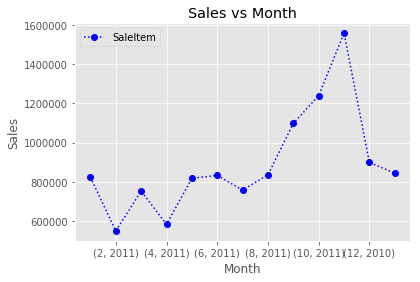

In [36]:
from pandas import Series
import matplotlib.dates as dates
df1.plot(xticks = range(1,12,2), c = 'b', marker = 'o', ls = 'dotted')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales vs Month')
plt.show()

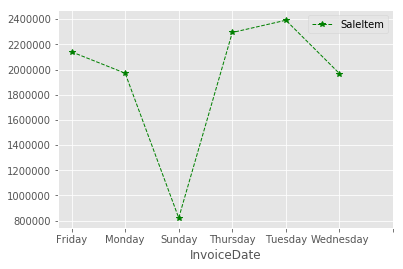

  InvoiceDate     SaleItem
0      Friday  2140069.651
1      Monday  1970540.651
2      Sunday   821976.331
3    Thursday  2293803.480
4     Tuesday  2391082.431
5   Wednesday  1968148.610


In [24]:
################################################## Categorising AS per Weekdays and aggregating the total sales #################
df3 = df.loc[:,['InvoiceDate','SaleItem']]
df3 = df3.groupby(pd.to_datetime(df.InvoiceDate).dt.weekday_name).sum()
x = df3.plot(xticks=range(7), marker = '*', ls = 'dashed', lw = 1, c = 'g')
plt.show()
df3 = df3.reset_index()
print(df3)

             SaleItem
InvoiceDate          
2010-12-01   59286.02
2010-12-02   49289.48
2010-12-03   48266.96
2010-12-05   32165.95
2010-12-06   55800.74


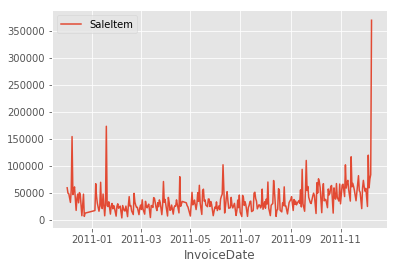

In [18]:
########################################## Categorising AS per dates and aggregating the total sales ############################
df4 = df.loc[:,['InvoiceDate','SaleItem']]
df4 = df4.groupby([df.InvoiceDate.dt.date]).sum()

print(df4.head())
df4.plot(, marker = 'o')
plt.show()

              SaleItem
InvoiceDate           
1            326676.37
2            320446.91
3            351856.27
4            403309.95
5            482399.91


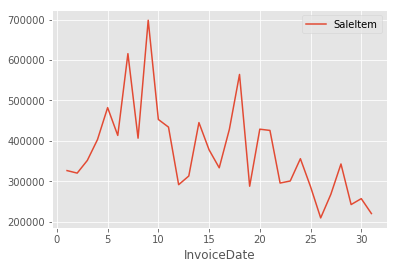

In [19]:
########################################## Categorising AS per Days of Months and aggregating the total sale ####################
df5 = df.loc[:,['InvoiceDate','SaleItem']]
df5 = df5.groupby([df.InvoiceDate.dt.day]).sum()

print(df5.head())
df5.plot()
plt.show()

In [27]:
import calendar
df2 = df[df.InvoiceDate < datetime.date(2011,12, 1)].loc[:,['InvoiceDate','SaleItem']]
df2 = df2.groupby([df.InvoiceDate.dt.month, df.InvoiceDate.dt.year], as_index=False).sum()
print(list(df2))
df2

['SaleItem']


,SaleItem
0,822728.860
1,549201.130
2,752011.640
3,582410.121
4,817738.530
5,832356.680
6,757142.271
7,835596.250
8,1097492.722
9,1239253.930


In [36]:
df6 = pd.DataFrame(np.array(list(df3.loc[:,'SaleItem'])))
df6.columns = ['SaleItem']
df6.loc[:,'weekday'] = np.array([6,2,1,5,3,4])
df6 = df6.sort_values(by = ['weekday'], ascending = True)

In [28]:

df7 = pd.DataFrame(np.array(list(df2.SaleItem)))
df7.columns = ['SaleItem']
df7.loc[:,'month'] = np.arange(1,13)
df7

,SaleItem,month
0,822728.860,1
1,549201.130,2
2,752011.640,3
3,582410.121,4
4,817738.530,5
5,832356.680,6
6,757142.271,7
7,835596.250,8
8,1097492.722,9
9,1239253.930,10


In [23]:
months = df7.month.values.reshape((len(df7.month),-1))

In [24]:
####################################################### Rough & Dirty Implementation ############################################
############################### Using Support vector Regression #################################################################

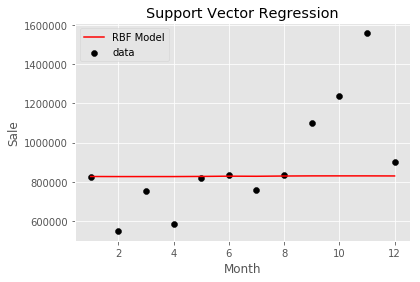

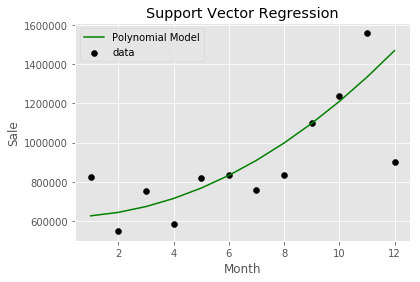

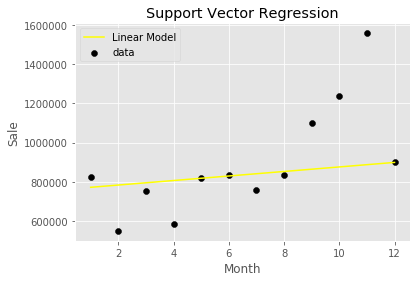

(829876.07561916462, 875450.52285711362, 1209438.8663999727)



In [25]:
def predicted_prices(dates, prices, x):
    # one dimensional form
    dates = dates.values.reshape((len(dates),-1))
    svr_lin = SVR(kernel = 'linear', C = 1e3)
    svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2)
    svr_rbf = SVR(kernel = 'rbf', C = 1e3)
    
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color = 'black', label = 'data')
    plt.plot(dates, svr_rbf.predict(dates), color = 'red', label = 'RBF Model')
    
    plt.xlabel('Month')
    plt.ylabel('Sale')
    plt.legend()
    plt.title('Support Vector Regression')
    plt.show()
    
    plt.scatter(dates, prices, color = 'black', label = 'data')
    plt.plot(dates, svr_poly.predict(dates), color = 'green', label = 'Polynomial Model')
    plt.xlabel('Month')
    plt.ylabel('Sale')
    plt.legend()
    plt.title('Support Vector Regression')
    plt.show()
    
    plt.scatter(dates, prices, color = 'black', label = 'data')
    plt.plot(dates, svr_lin.predict(dates), color = 'yellow', label = 'Linear Model')
    plt.xlabel('Month')
    plt.ylabel('Sale')
    plt.legend()
    plt.title('Support Vector Regression')
    plt.show()
    
    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0]

predicted_price = predicted_prices(df7.month, df7.SaleItem, 10)

print(predicted_price)
print()

In [205]:
############################################### Code Optimization ##############################################################
def best_score(months, sales):
    # one dimensional form
    months = months.values.reshape((len(months),-1))
    
    best_score = 0
    best_C = 1
    best_gamma = 0.001
    best_degree = 0

    for i in np.arange(1,1e3,1):
        for j in np.arange(0.001,0.1,0.001):
            model = SVR(kernel = 'rbf',C = i, gamma = j)
            model.fit(months, sales)
            new_score = model.score(months, sales)
            if(best_score < new_score):
                best_score = new_score
                best_C = i
                best_gamma = j
                algo = 'rbf'

    for i in np.arange(1,1e3,1):
            model = SVR(kernel = 'poly',C = i, degree = 2)
            model.fit(months, sales)
            new_score = model.score(months, sales)
            if(best_score < new_score):
                best_score = new_score
                best_C = i
                algo = 'poly'
                best_degree = 2
                
    for i in np.arange(1,1e3,1):
            model = SVR(kernel = 'poly',C = i, degree = 3)
            model.fit(months, sales)
            new_score = model.score(months, sales)
            if(best_score < new_score):
                best_score = new_score
                best_C = i
                algo = 'poly'
                best_degree = 3
                
    for i in np.arange(1,1e3,1):
            model = SVR(kernel = 'linear',C = i)
            model.fit(months, sales)
            new_score = model.score(months, sales)
            if(best_score < new_score):
                best_score = new_score
                best_C = i
                algo = 'linear'

    print("Best C, gamma and score is:", best_C, best_gamma, best_score, algo, best_degree)

In [206]:
best_score(df7.month, df7.SaleItem)

Best C, gamma and score is: 1711.0 0.001 0.428556631856 poly 2


In [212]:
########### Best C, gamma and score is: 164.0 0.001 0.522566508723 poly 2 #####################################################

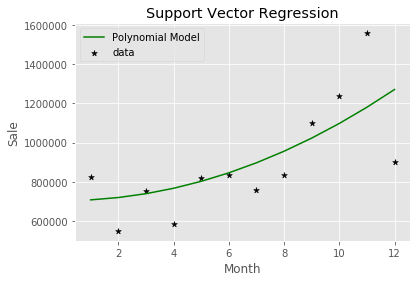

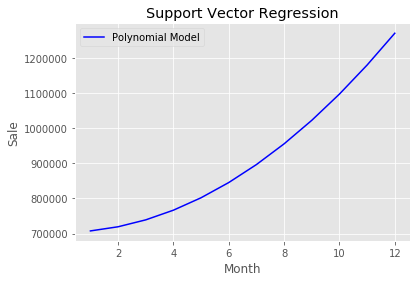

[707560.16000001598, 719368.16000001598, 739048.16000001598, 766600.16000001598, 802024.16000001598, 845320.16000001598, 896488.16000001598, 955528.16000001598, 1022440.160000016, 1097224.160000016, 1179880.160000016, 1270408.160000016]


In [32]:
############################### Final values ##################################################################################

## Function for Plotting Graph ##################################################################################################

def Plot_graph(dates, prices, algo, best_C, best_degree):
    # one dimensional form
    dates = dates.values.reshape((len(dates),-1))
    svr_poly = SVR(kernel = algo, C = best_C, degree = best_degree)
    svr_poly.fit(dates, prices)
    plt.scatter(dates, prices, color = 'black', label = 'data', marker = '*')
    plt.plot(dates, svr_poly.predict(dates), color = 'green', label = 'Polynomial Model')
    plt.xlabel('Month')
    plt.ylabel('Sale')
    plt.legend()
    plt.title('Support Vector Regression')
    plt.show()
    plt.plot(dates, svr_poly.predict(dates), color = 'blue', label = 'Polynomial Model')
    plt.xlabel('Month')
    plt.ylabel('Sale')
    plt.legend()
    plt.title('Support Vector Regression')
    plt.show()
    
Plot_graph(df7.month, df7.SaleItem, 'poly', 164.0, 2)

############ Function for predicting values as per month ########################################################################

def predicted_prices(dates, prices, x, algo, best_C, best_degree):
    # one dimensional form
    dates = dates.values.reshape((len(dates),-1))
    svr_poly = SVR(kernel = algo, C = best_C, degree = best_degree)
    svr_poly.fit(dates, prices)
    # return ([svr_poly.predict(x)[0], svr_poly.dual_coef_, svr_poly.intercept_])
    return svr_poly.predict(x)[0]

x = []
for i in range(1,13):         
        x.append(predicted_prices(df7.month, df7.SaleItem, i, 'poly', 164.0, 2))
print(x)

In [62]:
# add recommendation to rahulpriyadarshi account database (Prototype FUnctionality check purpose only)
from firebase import firebase
firebase = firebase.FirebaseApplication("https://fir-trial-4c092.firebaseio.com")
firebase.delete('/sales prediction', None)
y = df[df.InvoiceDate > datetime.date(2010,12,31)].loc[:,'InvoiceDate'].dt.strftime('%b').unique()
for i in np.arange(12):
        firebase.put('/sales prediction/', str(y[i]), str(x[i]))

In [64]:
# add recommendation to Q-Down account database
from firebase import firebase
firebase = firebase.FirebaseApplication("https://qdown-20e6d.firebaseio.com/",None)
firebase.delete('/sales prediction', None)
y = df[df.InvoiceDate > datetime.date(2010,12,31)].loc[:,'InvoiceDate'].dt.strftime('%b').unique()
for i in np.arange(12):
        firebase.put('/sales prediction/', str(y[i]), str(x[i]))
